## Web Scraping

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Creating empty data drame
df= pd.DataFrame({'Name':[''], 'Speciality':[''], 'Degree':[''], 'Year_of_experience':[''] , 'Location':[''] , 'City':[''] ,'dp_score':[''], 'npv':[''], 'consultation_fee':['']})
#Creating list of cities from where data is to be extracted
lis=['Bangalore','Delhi','Mumbai']
#speciality of doctors whose data to be extracted
Speciality = 'chiropractor'
#for loop to take city name form lis and each time change url according to city
for i in lis:
    driver = webdriver.Chrome()
    url = f'https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22chiropractor%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={i}'
    driver.get(url)
    time.sleep(2)
    
    scroll_pause_time = 2 # You can set your own pause time. dont slow too slow that might not able to load more data
    screen_height = driver.execute_script("return window.screen.height;")  # get the screen height of the web
    A = 1

    while True:
        # scroll one screen height each time
        driver.execute_script("window.scrollTo(0, {screen_height}*{A});".format(screen_height=screen_height, A=A))
        A += 1
        time.sleep(scroll_pause_time)
        # update scroll height each time after scrolled, as the scroll height can change after we scrolled the page
        scroll_height = driver.execute_script("return document.body.scrollHeight;")
        # Break the loop when the height we need to scroll to is larger than the total scroll height
        if (screen_height) * A > scroll_height:
            break
    #after scrolling getting the HTML of webpage and extrancting data
    soup = BeautifulSoup(driver.page_source,'lxml')
    postings = soup.find_all('div' , class_= 'u-border-general--bottom')
    for post in postings:
        try:
            link = post.find('div' , class_ = 'listing-doctor-card').find('a').get('href')
            link_full = 'https://www.practo.com'+link
            driver.get(link_full)
            soup2 = BeautifulSoup(driver.page_source,'lxml')

            #extracting name
            try:
                name = soup2.find('h1' , class_ = 'c-profile__title u-bold u-d-inlineblock').text
            except:
                pass       
            #extracting degree
            try:
                Degree = soup2.find('p' , class_ = 'c-profile__details').text
            except:
                pass
            #extracting years of experience
            try:
                Year_of_experience = soup2.find('div' , class_ = 'c-profile__details').find_all('h2')[-1].text
            except:
                pass
            #extracting location
            try:
                Location = soup2.find('h4' , class_ = 'c-profile--clinic__location').text
            except:
                pass
            #extracting dp score
            try:
                dp_score = soup2.find('span' , class_ = 'u-green-text u-bold u-large-font').text.strip()
            except:
                pass
            #extracting npv
            try:
                npv = soup2.find('span' , class_ = 'u-smallest-font u-grey_3-text').text
            except:
                pass
            #extracting consulting fee
            try:
                consultant_fee = soup2.find('span' , class_ = 'u-strike').text.strip()
            except:
                consultant_fee = soup2.find('div' , class_ = 'u-f-right u-large-font u-bold u-valign--middle u-lheight-normal').text.strip()
            #appending all data into dataframe
            df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee} , ignore_index = True)
        except:
            pass

C:\Users\dellpc\AppData\Local\Temp\ipykernel_4640\2890540932.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee} , ignore_index = True)
C:\Users\dellpc\AppData\Local\Temp\ipykernel_4640\2890540932.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee} , ignore_index = True)
C:\Users\dellpc\AppData\Local\Temp\ipykernel_4640\2890540932.py:74: FutureWarning: The frame.append method is deprecated and

In [3]:
df

,Name,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee
0,,,,,,,,,
1,Mr. Prathap Addageethala,chiropractor,Doctor of Chiropractic,11 Years Experience Overall (9 years as speci...,"Indiranagar, Bangalore",Bangalore,96%,(1056 votes),₹ 2500 fee
2,Dr. Violette Lepinay,chiropractor,Doctorate in Chiropractic,5 Years Experience Overall (2 years as specia...,"Indiranagar, Bangalore",Bangalore,95%,(185 votes),₹ 2500 fee
3,Dr. Gholam Sarwar (Physiotherapist),chiropractor,"BPTh/BPT, Doctor of Chiropractic",15 Years Experience Overall (3 years as speci...,"Dwarka Sector 6, Delhi",Delhi,99%,(353 votes),₹ 700 fee
4,Dr. Khushnoor Alam (PT),chiropractor,"Fellowship in Neurological Rehabilitation, MPT...",7 Years Experience Overall (5 years as specia...,"Vasant Kunj, Delhi",Delhi,99%,(353 votes),₹ 500 fee
5,Mr. Shiv Bajaj,chiropractor,Doctor of Chiropractic,14 Years Experience Overall (12 years as spec...,"Hazrat Nizamuddin, Delhi",Delhi,92%,(12 votes),₹ 3000 fee
6,Dr. Shubham Kamble (Physiotherapist),chiropractor,"MPTh/MPT - Neurological Physiotherapy, Master ...",3 Years Experience Overall (2 years as specia...,"Andheri West, Mumbai",Mumbai,100%,(23 votes),₹ 800 fee
7,Dr. Kalpesh Ghelani,chiropractor,Doctorate in Chiropractic,21 Years Experience Overall,"Bandra West, Mumbai",Mumbai,100%,(378 votes),₹ 3000 fee


In [4]:
df.nunique()

Name                  8
Speciality            2
Degree                6
Year_of_experience    8
Location              7
City                  4
dp_score              6
npv                   7
consultation_fee      6
dtype: int64

In [5]:
df['Speciality'].value_counts()

chiropractor    7
                1
Name: Speciality, dtype: int64

In [6]:
df.to_csv('chiropractor.csv',index=False)

### Similarly we can extract data for other speciality by doing some changes in this code:

### In line 3, assign the name of speciality to 'Speciality' variable.

### In line 6, assign the url of that speciality to 'url' variable.

### Specialities: Cardiologist, Chiropractor, Dentist, Dermatologist, Dietitian, Gastroenterologist, bariatric surgeon, Gynecologist, Infertility Specialist, Neurologist, Neurosurgeon, Ophthalmologist, Orthopedist, Pediatrician, Physiotherapist, Psychiatrist, Pulmonologist, Rheumatologists, Urologist

In [7]:
specialists = [
    {"Specialist": "Cardiologist", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22cardiologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Chiropractor", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22chiropractor%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Dentist", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22dentist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Dermatologist", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22dermatologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Dietitian", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22dietitian%2Fnutritionist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Gastroenterologist", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22gastroenterologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Bariatric Surgeon", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22bariatric%20surgeon%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Gynecologist", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22gynecologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Infertility Specialist", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22infertility%20specialist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Neurologist", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22neurologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Neurosurgeon", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22neurosurgeon%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Ophthalmologist", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22ophthalmologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Orthopedist", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22orthopedist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Pediatrician", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22pediatrician%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Physiotherapist", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22physiotherapist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Psychiatrist", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22psychiatrist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Pulmonologist", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22pulmonologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Rheumatologist", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22rheumatologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"},
    {"Specialist": "Urologist", "Link": "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22urologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city"}
]


In [8]:
df1 = pd.DataFrame(specialists).reset_index()

In [9]:
df1

,index,Specialist,Link
0,0,Cardiologist,https://www.practo.com/search/doctors?results_...
1,1,Chiropractor,https://www.practo.com/search/doctors?results_...
2,2,Dentist,https://www.practo.com/search/doctors?results_...
3,3,Dermatologist,https://www.practo.com/search/doctors?results_...
4,4,Dietitian,https://www.practo.com/search/doctors?results_...
5,5,Gastroenterologist,https://www.practo.com/search/doctors?results_...
6,6,Bariatric Surgeon,https://www.practo.com/search/doctors?results_...
7,7,Gynecologist,https://www.practo.com/search/doctors?results_...
8,8,Infertility Specialist,https://www.practo.com/search/doctors?results_...
9,9,Neurologist,https://www.practo.com/search/doctors?results_...


### By using the above links we scrap the data from each speciality

### Cocat all the csv files

In [10]:
df2 = pd.concat(
    map(pd.read_csv, ['Dentist.csv','Gynecologist.csv','Cardiologist.csv','Orthopedist.csv','Rheumatologist.csv','chiropractor.csv','bariatric_surgeon.csv','Pulmonologist.csv','Neurosurgeon.csv','Neurologist.csv','Gastroenterologist.csv','dietitian.csv','Psychiatrist.csv','Urologist.csv','Pediatrician.csv','Dermatologist.csv','Physiotherapist.csv','Infertility Specialist.csv','Ophthalmologist.csv']),ignore_index=True)

In [11]:
df2

,Name,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dr. Ganesh Shetty,Dentist,"BDS, MICOI (USA)",25 Years Experience Overall,"Kalyan Nagar, Bangalore",Bangalore,98%,(3787 votes),₹500
2,Dr. Jnanesha H.C,Dentist,"BDS, MDS - Orthodontics",21 Years Experience Overall (16 years as spec...,"Jayanagar 4 Block, Bangalore",Bangalore,98%,(258 votes),₹300
3,Dr. Sumanth Shetty,Dentist,"BDS, MDS - Paedodontics And Preventive Dentistry",24 Years Experience Overall,"Koramangala, Bangalore",Bangalore,97%,(4311 votes),₹300
4,Dr. Anjali Shetty,Dentist,"BDS, MDS - Orthodontics",21 Years Experience Overall (16 years as spec...,"Kalyan Nagar, Bangalore",Bangalore,99%,(1528 votes),₹500
...,...,...,...,...,...,...,...,...,...
5420,Dr. Haresh Asnani,Ophthalmologist,"MBBS, MS - Ophthalmology",37 Years Experience Overall (34 years as spec...,"Chembur East, Mumbai",Mumbai,100%,(17 votes),₹ 800 fee
5421,Dr. Nidhi Thaker,Ophthalmologist,"MBBS, DNB - Ophthalmology",13 Years Experience Overall (5 years as speci...,"Goregaon West, Mumbai",Mumbai,100%,(17 votes),₹ 700 fee
5422,Dr. Sunita Meena,Ophthalmologist,"MBBS, MS - Ophthalmology",14 Years Experience Overall (9 years as speci...,"Chembur, Mumbai",Mumbai,100%,(17 votes),₹ 1000 fee
5423,Dr. Prashant M Koranmath,Ophthalmologist,"MS - Ophthalmology, MD - Physician",9 Years Experience Overall (4 years as specia...,"Malad West, Mumbai",Mumbai,100%,(17 votes),₹ 1200 fee


In [12]:
df2['Speciality'].value_counts()

Dentist                      1469
Gynecologist/obstetrician     917
Infertility Specialist        362
Orthopedist                   320
Physiotherapist               299
Dermatologist                 287
Ophthalmologist               269
Pediatrician                  252
Cardiologist                  206
Urologist                     162
Psychiatrist                  150
Neurosurgeon                  128
dietitian/nutritionist        125
Neurologist                   117
Gastroenterologist            114
Pulmonologist                  90
bariatric surgeon              85
Rheumatologist                 47
chiropractor                    7
Name: Speciality, dtype: int64

### Remove Dupicate Values in the DataSets

In [13]:
df2.drop_duplicates(inplace=True)

In [14]:
df2

,Name,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dr. Ganesh Shetty,Dentist,"BDS, MICOI (USA)",25 Years Experience Overall,"Kalyan Nagar, Bangalore",Bangalore,98%,(3787 votes),₹500
2,Dr. Jnanesha H.C,Dentist,"BDS, MDS - Orthodontics",21 Years Experience Overall (16 years as spec...,"Jayanagar 4 Block, Bangalore",Bangalore,98%,(258 votes),₹300
3,Dr. Sumanth Shetty,Dentist,"BDS, MDS - Paedodontics And Preventive Dentistry",24 Years Experience Overall,"Koramangala, Bangalore",Bangalore,97%,(4311 votes),₹300
4,Dr. Anjali Shetty,Dentist,"BDS, MDS - Orthodontics",21 Years Experience Overall (16 years as spec...,"Kalyan Nagar, Bangalore",Bangalore,99%,(1528 votes),₹500
...,...,...,...,...,...,...,...,...,...
5420,Dr. Haresh Asnani,Ophthalmologist,"MBBS, MS - Ophthalmology",37 Years Experience Overall (34 years as spec...,"Chembur East, Mumbai",Mumbai,100%,(17 votes),₹ 800 fee
5421,Dr. Nidhi Thaker,Ophthalmologist,"MBBS, DNB - Ophthalmology",13 Years Experience Overall (5 years as speci...,"Goregaon West, Mumbai",Mumbai,100%,(17 votes),₹ 700 fee
5422,Dr. Sunita Meena,Ophthalmologist,"MBBS, MS - Ophthalmology",14 Years Experience Overall (9 years as speci...,"Chembur, Mumbai",Mumbai,100%,(17 votes),₹ 1000 fee
5423,Dr. Prashant M Koranmath,Ophthalmologist,"MS - Ophthalmology, MD - Physician",9 Years Experience Overall (4 years as specia...,"Malad West, Mumbai",Mumbai,100%,(17 votes),₹ 1200 fee


### Data Cleaning

#### Null Handling & Remove Noise Values

In [15]:
# Years_of__Experience Column :- Extracting only numeric values
df2['Year_of_experience'] = df2['Year_of_experience'].str.extract('(\d+)')

In [16]:
# dp_score column :- Extracting only numeric values
df2['dp_score'] = df2['dp_score'].str.extract('(\d+)')

In [17]:
# npv column :- Extracting only numeric values
df2['npv'] = df2['npv'].str.extract('(\d+)')

In [18]:
# consultation_fee column :- Extracting only numeric values
df2['consultation_fee'] = df2['consultation_fee'].str.extract('(\d+)')

In [19]:
df2.head()

,Name,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dr. Ganesh Shetty,Dentist,"BDS, MICOI (USA)",25,"Kalyan Nagar, Bangalore",Bangalore,98,3787,500
2,Dr. Jnanesha H.C,Dentist,"BDS, MDS - Orthodontics",21,"Jayanagar 4 Block, Bangalore",Bangalore,98,258,300
3,Dr. Sumanth Shetty,Dentist,"BDS, MDS - Paedodontics And Preventive Dentistry",24,"Koramangala, Bangalore",Bangalore,97,4311,300
4,Dr. Anjali Shetty,Dentist,"BDS, MDS - Orthodontics",21,"Kalyan Nagar, Bangalore",Bangalore,99,1528,500


In [20]:
df2.isnull().sum()

Name                  1
Speciality            1
Degree                1
Year_of_experience    2
Location              1
City                  1
dp_score              1
npv                   1
consultation_fee      1
dtype: int64

In [21]:
df2.dropna(inplace=True)

In [22]:
df2.shape

(5391, 9)

In [23]:
for i in df2.columns:
    print(i,df2[i].sort_values().unique(),'\n',sep= '\n')

Name
['Dr. (Col) M. C. Sharma' 'Dr. (Col.) O P Garg'
 'Dr. (Lt Gen) CS Narayanan' ... 'Ms. Venu Adhiya Hirani'
 'Ms. Vidya Rao Karane' 'Ms. Vinny Joglekar']


Speciality
['Cardiologist' 'Dentist' 'Dermatologist' 'Gastroenterologist'
 'Gynecologist/obstetrician' 'Infertility Specialist' 'Neurologist'
 'Neurosurgeon' 'Ophthalmologist' 'Orthopedist' 'Pediatrician'
 'Physiotherapist' 'Psychiatrist' 'Pulmonologist' 'Rheumatologist'
 'Urologist' 'bariatric surgeon' 'chiropractor' 'dietitian/nutritionist']


Degree
[' FRCP, DM - Neurology, MBBS'
 ' FRCP, MBBS, Member of the Royal College of Paediatrics and Child Health (MRCPCH, London, Glasgow or Edinburgh), MRCP (UK)'
 'B.Sc. - Home Science (Food & Nutrition)'
 'B.Sc. - Home Science (Food & Nutrition), M.Sc. - Home Science (Food & Nutrition)'
 'B.Sc.- Clinical Nutrition & Dietetics, M.Sc. - Home Science (Food & Nutrition), PhD - Yoga'
 'BAMS' 'BAMS, DNHE' 'BAMS, Diploma in Clinical Nutrition'
 'BAMS, Fellowship in Applied Nutrition(FAN)' 'BD

#### Change the DataTypes

In [24]:
df2.dtypes

Name                  object
Speciality            object
Degree                object
Year_of_experience    object
Location              object
City                  object
dp_score              object
npv                   object
consultation_fee      object
dtype: object

In [25]:
# Converting to numeric column
for i in df2.columns:
    df2[i] = pd.to_numeric(df2[i] , errors = 'ignore')

In [26]:
df2.dtypes

Name                  object
Speciality            object
Degree                object
Year_of_experience     int64
Location              object
City                  object
dp_score               int64
npv                    int64
consultation_fee       int64
dtype: object

#### In the data sets Location column and city column both have city name which is not generally required. so here we will split the column using ',' delimeter and then remove the column contain city name.

In [27]:
df2[['Location', 'b']] = df2.Location.str.split(",", expand = True)

In [28]:
df2.drop('b' , axis=1 , inplace=True)

In [29]:
df2

,Name,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee
1,Dr. Ganesh Shetty,Dentist,"BDS, MICOI (USA)",25,Kalyan Nagar,Bangalore,98,3787,500
2,Dr. Jnanesha H.C,Dentist,"BDS, MDS - Orthodontics",21,Jayanagar 4 Block,Bangalore,98,258,300
3,Dr. Sumanth Shetty,Dentist,"BDS, MDS - Paedodontics And Preventive Dentistry",24,Koramangala,Bangalore,97,4311,300
4,Dr. Anjali Shetty,Dentist,"BDS, MDS - Orthodontics",21,Kalyan Nagar,Bangalore,99,1528,500
5,Dr. K.A. Mohan,Dentist,"BDS, MDS - Orthodontics",54,Domlur,Bangalore,100,20,500
...,...,...,...,...,...,...,...,...,...
5420,Dr. Haresh Asnani,Ophthalmologist,"MBBS, MS - Ophthalmology",37,Chembur East,Mumbai,100,17,800
5421,Dr. Nidhi Thaker,Ophthalmologist,"MBBS, DNB - Ophthalmology",13,Goregaon West,Mumbai,100,17,700
5422,Dr. Sunita Meena,Ophthalmologist,"MBBS, MS - Ophthalmology",14,Chembur,Mumbai,100,17,1000
5423,Dr. Prashant M Koranmath,Ophthalmologist,"MS - Ophthalmology, MD - Physician",9,Malad West,Mumbai,100,17,1200


#### Separate the Numerical Columns and Categorical Columns

In [30]:
num=[]
cat=[]
for i in df2.columns:
    if df2[i].dtype=="O":
        cat.append(i)
    else:
        num.append(i)

In [31]:
num

['Year_of_experience', 'dp_score', 'npv', 'consultation_fee']

In [32]:
cat

['Name', 'Speciality', 'Degree', 'Location', 'City']

In [33]:
cat.remove('Name')

### Exploratory data analysis (EDA)

In [34]:
df2.describe()

,Year_of_experience,dp_score,npv,consultation_fee
count,5391.000000,5391.000000,5391.000000,5391.000000
mean,19.982378,93.881655,178.745316,861.692265
std,10.106238,9.787980,373.939548,506.110493
min,1.000000,19.000000,11.000000,0.000000
25%,13.000000,93.000000,23.000000,500.000000
50%,18.000000,97.000000,59.000000,800.000000
75%,25.000000,100.000000,173.000000,1000.000000
max,65.000000,100.000000,8130.000000,5000.000000


In [35]:
for i in cat:
    print(df2[i].value_counts())

Dentist                      1460
Gynecologist/obstetrician     913
Infertility Specialist        362
Orthopedist                   320
Physiotherapist               299
Dermatologist                 287
Ophthalmologist               269
Pediatrician                  252
Cardiologist                  205
Urologist                     162
Psychiatrist                  150
Neurosurgeon                  127
dietitian/nutritionist        125
Neurologist                   117
Gastroenterologist            114
Pulmonologist                  90
bariatric surgeon              85
Rheumatologist                 47
chiropractor                    7
Name: Speciality, dtype: int64
BDS                                                                                                  625
MBBS, MS - Obstetrics & Gynaecology                                                                  249
MBBS, MD - Obstetrics & Gynaecology                                                                  223
BPTh/BPT

### Number of Doctors in Each City

In [36]:
#This will show numbers of doctors in each city
num_doc_city= df2.groupby(['City'],as_index=False)['Name'].count().sort_values(by='Name',ascending=False)
num_doc_city

,City,Name
0,Bangalore,2169
1,Delhi,1764
2,Mumbai,1458


##### From the above tables we clearly seen that Bangalore has highest number of doctors as compared to Delhi and Mumbai.

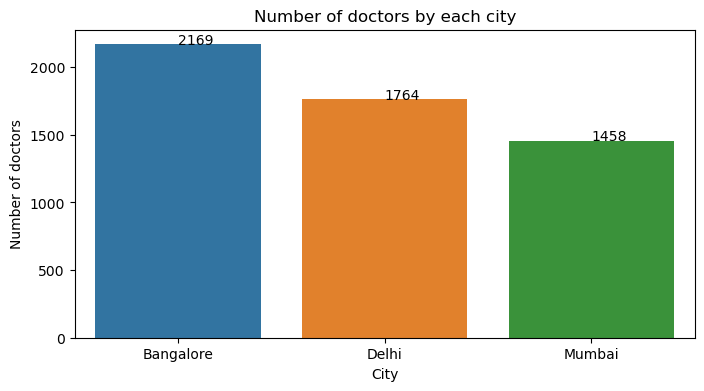

In [37]:
plt.figure(figsize=(8,4))
ax=sns.barplot(x='City',y='Name',data=num_doc_city)
# Add labels and title
plt.xlabel('City')
plt.ylabel('Number of doctors')
plt.title('Number of doctors by each city')
# Add values to the bars
for i, value in enumerate(num_doc_city['Name']):
    plt.text(i, value, str(value))
# Show the chart
plt.show()


### Count of doctors in each speciality

In [38]:
#This shows number of doctors in each speciality
num_doc_speciality= df2.groupby(['Speciality'],as_index=False)['Name'].count().sort_values(by='Name',ascending=False)
num_doc_speciality

,Speciality,Name
1,Dentist,1460
4,Gynecologist/obstetrician,913
5,Infertility Specialist,362
9,Orthopedist,320
11,Physiotherapist,299
2,Dermatologist,287
8,Ophthalmologist,269
10,Pediatrician,252
0,Cardiologist,205
15,Urologist,162


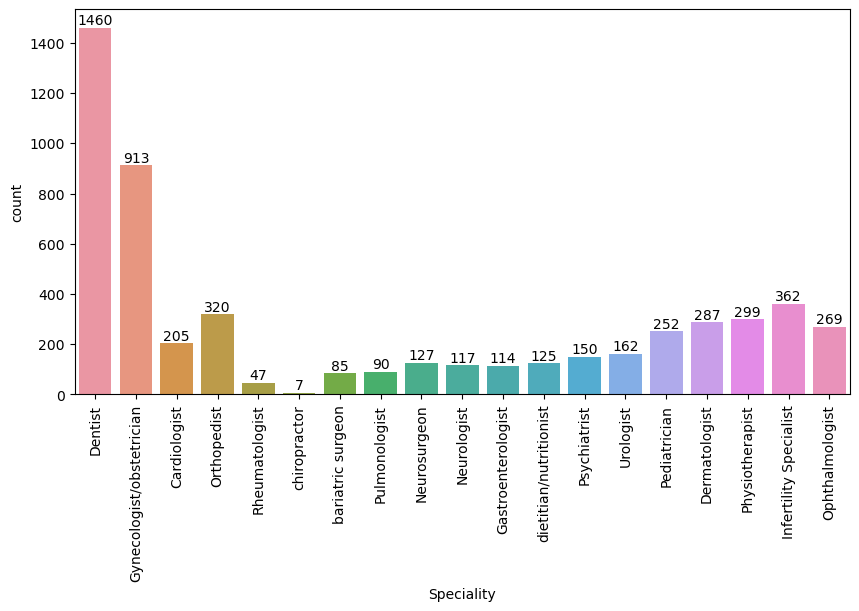

In [39]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Speciality',data = df2)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

### Number of doctors per speciality in each city

In [40]:
# this will show number of doctors of each speciality in each city
num_doc_speciality_city= df2.groupby(by=['City','Speciality'])['Name'].count().reset_index().sort_values(by=['City','Name'],ascending=[True,False])
num_doc_speciality_city

,City,Speciality,Name
1,Bangalore,Dentist,634
4,Bangalore,Gynecologist/obstetrician,432
5,Bangalore,Infertility Specialist,150
11,Bangalore,Physiotherapist,135
0,Bangalore,Cardiologist,103
8,Bangalore,Ophthalmologist,81
2,Bangalore,Dermatologist,80
15,Bangalore,Urologist,79
9,Bangalore,Orthopedist,77
3,Bangalore,Gastroenterologist,74


##### It is clearly seen that from above table in each city the number of dentist are more as compared to other speciality.

### Number of doctors in each Speciality having Highest number of Years of Experience

In [41]:
#This shows Top 10 number of doctors having Highest number  of Experience
num_doc_speciality_city= df2.groupby(by=['Year_of_experience','Speciality'])['Name'].count().reset_index().sort_values(by=['Year_of_experience','Name'],ascending=[True,False])
num_doc_speciality_city

,Year_of_experience,Speciality,Name
1,1,Physiotherapist,9
0,1,Dentist,2
3,1,dietitian/nutritionist,2
2,1,Psychiatrist,1
5,2,Physiotherapist,8
...,...,...,...
731,61,Neurosurgeon,1
732,62,Gynecologist/obstetrician,1
733,62,Infertility Specialist,1
734,64,Pediatrician,1


### Speciality wise Fees Analysis

In [42]:
# To findout min,max and average consultaion fee charged by each speciality
speciality_fee= {'consultation_fee':['min','max','median']}

In [43]:
sp=df2.groupby(by=['Speciality']).agg(speciality_fee).reset_index()
sp

Speciality consultation_fee              
                                           min   max  median
0                Cardiologist              500  3300  1000.0
1                     Dentist                0  2000   500.0
2               Dermatologist                0  3000  1000.0
3          Gastroenterologist              350  2300   900.0
4   Gynecologist/obstetrician                0  3000   850.0
5      Infertility Specialist                0  3000   850.0
6                 Neurologist              600  4100  1100.0
7                Neurosurgeon              500  5000  1000.0
8             Ophthalmologist              200  5000   800.0
9                 Orthopedist              200  3000  1000.0
10               Pediatrician              300  2500  1000.0
11            Physiotherapist                0  3000   500.0
12               Psychiatrist              740  3850  1450.0
13              Pulmonologist              500  3500  1000.0
14             Rheumatologist              400  3000  1000.0
15                  Urologist              350  2300  1000.0
16          bariatric surgeon              400  4000  1000.0
17               chiropractor              500  3000  2500.0
18     dietitian/nutritionist                0  4000   900.0

##### From above table we found out Neurosurgeon and Ophtalmologist speciality charges high consultaion fees and almost free consultaion chargres speciality will be Dentist, Dermatologist, Gynecologist/obstetrician, Infertility Specialist, Physiotherapist and dietitian/nutritionist

<function matplotlib.pyplot.show(close=None, block=None)>

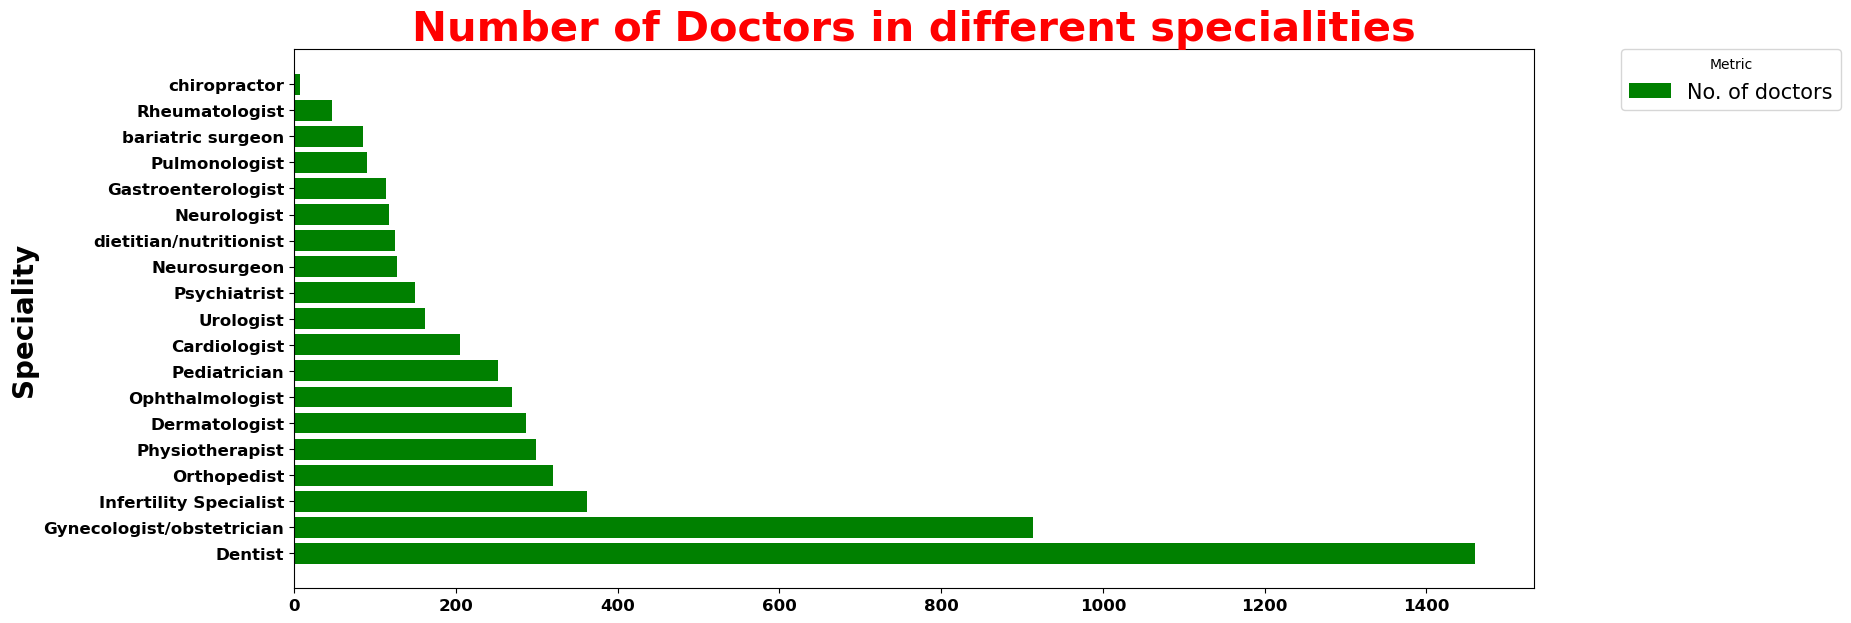

In [44]:
plt.figure(figsize=(16,7))  #graph size

plt.barh(num_doc_speciality['Speciality'],num_doc_speciality['Name'],color='g',label='No. of doctors',linestyle=':',linewidth=2)#assining x-y axis and other aesthetic
plt.title('Number of Doctors in different specialities',fontsize=30,color='r',weight='bold',loc='center')
plt.ylabel('Speciality',fontsize=20,weight='bold') #y-axis title
plt.xticks(fontsize = 12,weight='bold')
plt.yticks(fontsize = 12,weight='bold')

plt.grid(False) #adding gridlines
plt.legend(loc='upper left', title='Metric',fontsize=15,bbox_to_anchor=(1.07, 1),borderaxespad=0)

plt.show #print graph

#### From above bar chart we clearly seen that Most of the doctors are Dentist and least Chiropractor

<function matplotlib.pyplot.show(close=None, block=None)>

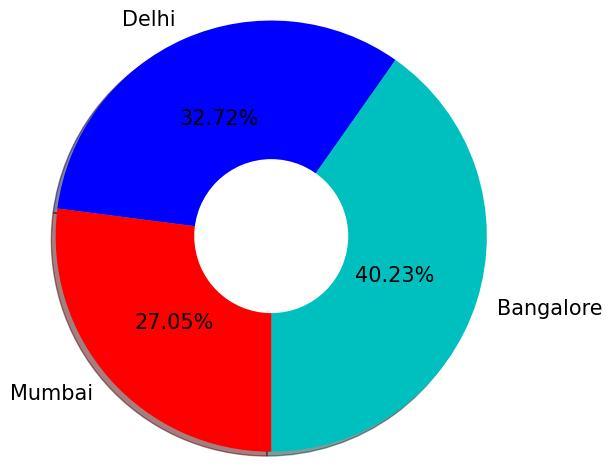

In [45]:
# Doughnut chart
plt.figure(figsize=(10,5))  #graph size

explode = [0.1,0.1,0.1,0.1,0.1,0.1] # To slice the perticuler section
colors = ["c", 'b','r','y','g','m'] # Color of each section
textprops = {"fontsize":15} # Font size of text in pie chart

plt.pie(num_doc_city['Name'], # Values
        labels = num_doc_city['City'], # Labels for each sections
        colors =colors, # Color of each section
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.4, # Radius to increase or decrease the size of pie chart 
       startangle = 270, # Start angle of first section
        textprops =textprops)

plt.pie([1],colors=['w'],radius=0.5)

plt.show #print graph

#### From the above Doughnut chart we clearly seen that the city like Bangalore has more percentages of doctors

## Correlation between the Variables By using Heatmap

Text(0.5, 1.0, 'Correlation-Heat Map')

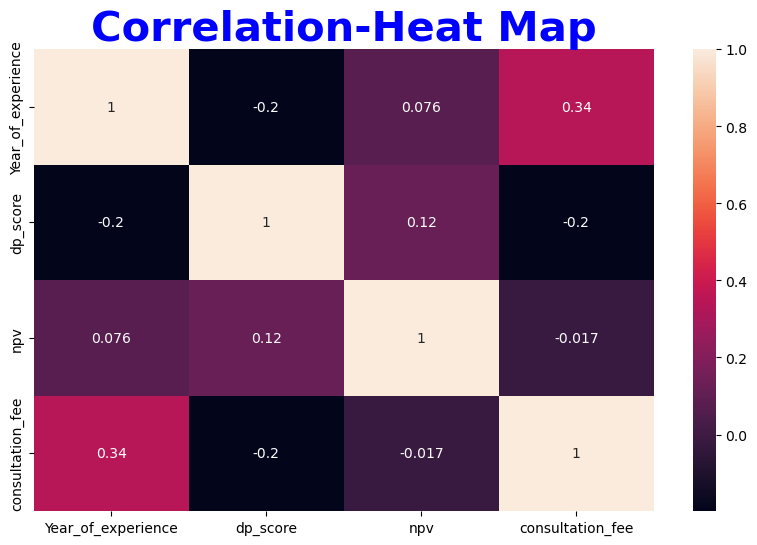

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),annot=True)
plt.title('Correlation-Heat Map',fontsize=30,color='b',weight='bold',loc='center')


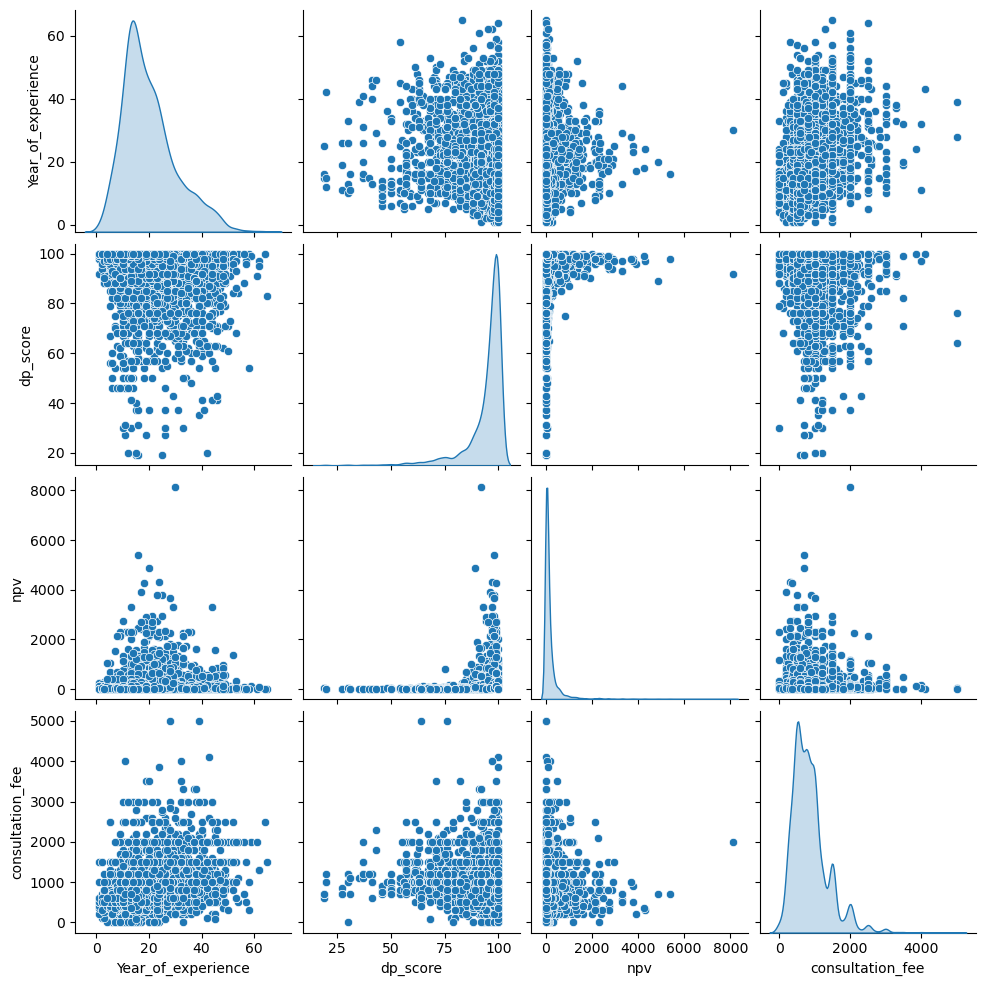

In [47]:
sns.pairplot(data=df2,diag_kind='kde')

array([[<AxesSubplot:title={'center':'Year_of_experience'}>,
        <AxesSubplot:title={'center':'dp_score'}>],
       [<AxesSubplot:title={'center':'npv'}>,
        <AxesSubplot:title={'center':'consultation_fee'}>]], dtype=object)

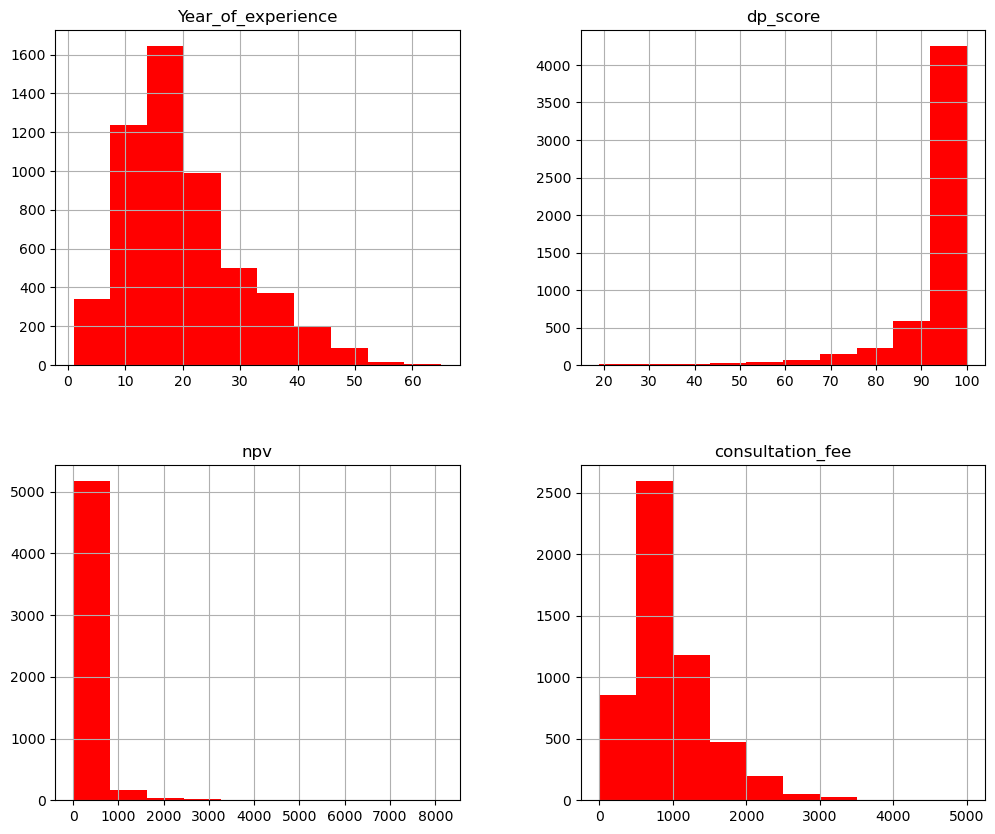

In [48]:
df2[num].hist(figsize=(12,10),color='red')

In [49]:
df2['Year_of_experience'].value_counts()

13    318
15    310
14    280
12    274
17    246
     ... 
56      2
59      1
65      1
61      1
64      1
Name: Year_of_experience, Length: 62, dtype: int64

### KDE Plot

<AxesSubplot:title={'center':'KDE Plot'}, xlabel='Year_of_experience', ylabel='Density'>

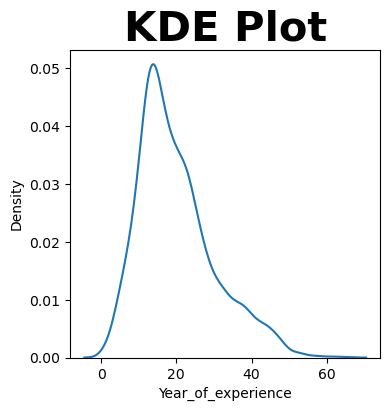

In [50]:
#shows distribution of  year of experience
plt.figure(figsize=(4, 4))
plt.title('KDE Plot',fontsize=30,weight='bold',loc='center')
sns.kdeplot(df2['Year_of_experience'])


##### From above kde plot we clearly seen that Most of the doctors belongs to the range of 13 to 15 years of experience

### Count of Top 10 doctors  acoording to their location and city

In [51]:
# This table shows number of doctors according to their location in that city
num_of_location_city=df2.groupby(by=['City','Location'])['Name'].count().reset_index().sort_values(by=['City','Name'],ascending=[True,False])
num_of_location_city

,City,Location,Name
158,Bangalore,Whitefield,137
41,Bangalore,HSR Layout,112
52,Bangalore,Indiranagar,93
15,Bangalore,Bannerghatta Road,89
136,Bangalore,Sarjapur Road,83
...,...,...,...
415,Mumbai,Nariman Point,1
422,Mumbai,Sakinaka,1
427,Mumbai,Sion East,1
434,Mumbai,Vidyavihar,1


In [52]:
# This table shows top 10 doctors accroding to their location and city
top_10=num_of_location_city.nlargest(10, columns=['Name'], keep='all')
top_10

,City,Location,Name
301,Delhi,Saket,143
158,Bangalore,Whitefield,137
302,Delhi,Sarita Vihar,124
41,Bangalore,HSR Layout,112
333,Mumbai,Andheri West,108
275,Delhi,Patparganj,97
394,Mumbai,Mahim,94
52,Bangalore,Indiranagar,93
411,Mumbai,Mulund West,90
15,Bangalore,Bannerghatta Road,89


#### The location like saket in delhi having most number of doctor are there

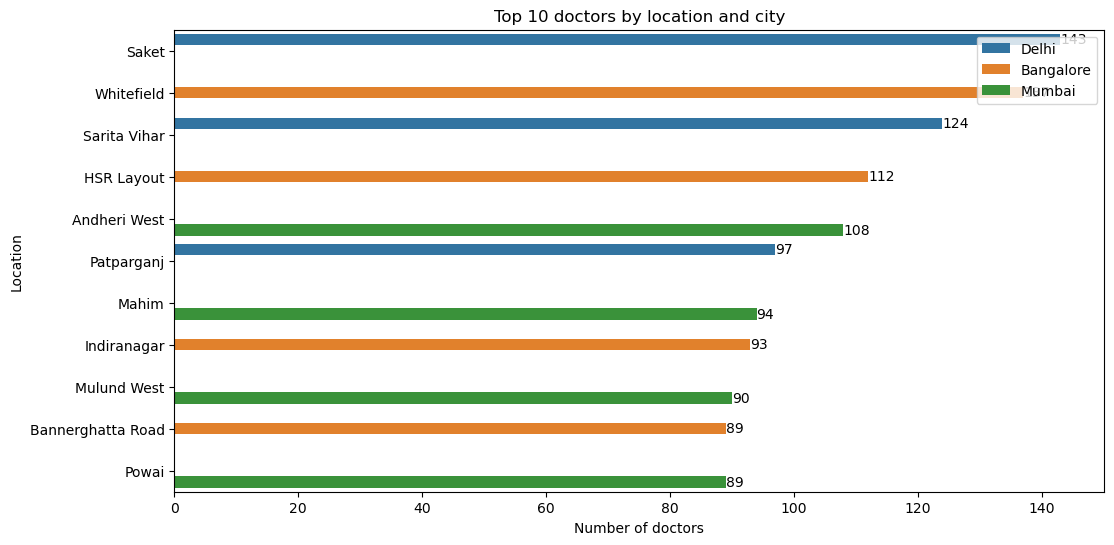

In [53]:
plt.figure(figsize=(12, 6))
# Create bar chart using seaborn
ax = sns.barplot(x='Name', y='Location', hue='City', data=top_10)
# Add labels and title
plt.xlabel('Number of doctors')
plt.ylabel('Location')
plt.title('Top 10 doctors by location and city')
# Add legend
ax.legend(loc='upper right')
# Add value labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
# Show the chart
plt.show()


### Top 10 Degree

In [54]:
top_degree=df2['Degree'].value_counts().reset_index().head(10)
top_degree

,index,Degree
0,BDS,625
1,"MBBS, MS - Obstetrics & Gynaecology",249
2,"MBBS, MD - Obstetrics & Gynaecology",223
3,BPTh/BPT,157
4,"MBBS, MS - Orthopaedics",143
5,"MBBS, DGO",141
6,"MBBS, DNB - Obstetrics & Gynecology",112
7,"MBBS, MD - Pediatrics",108
8,"MBBS, MS - Ophthalmology",107
9,"BDS, MDS - Conservative Dentistry & Endodontics",100


##### In this table we found out most common degress  will be BDS

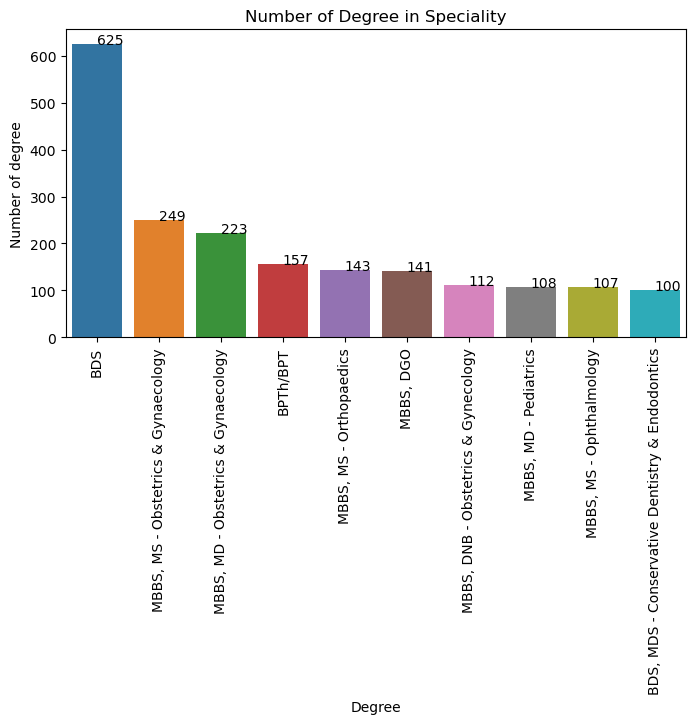

In [55]:
plt.figure(figsize=(8,4))
ax=sns.barplot(x='index',y='Degree',data=top_degree)
# Add labels and title
plt.xlabel('Degree')
plt.ylabel('Number of degree')
plt.title('Number of Degree in Speciality')
# Add values to the bars
for i, value in enumerate(top_degree['Degree']):
    plt.text(i, value, str(value))
# Rotate x-axis labels
plt.xticks(rotation=90)
# Show the chart
plt.show()

### Doctors having maximum number of specialization

In [56]:
doc_spec=df2['Name'].value_counts().reset_index().head(10)
doc_spec

,index,Name
0,Dr. Garima Sharma,4
1,Dr. Gaurav Garg,4
2,Dr. Nandita P Palshetkar,4
3,Dr. Jyotsna Patel,3
4,Dr. Ankit Gupta,3
5,Dr. Ila Gupta,3
6,Dr. Sheetal Agarwal,3
7,Dr. Sushma,3
8,Dr. Rekha Prashanth,3
9,Dr. Shweta Gupta,3


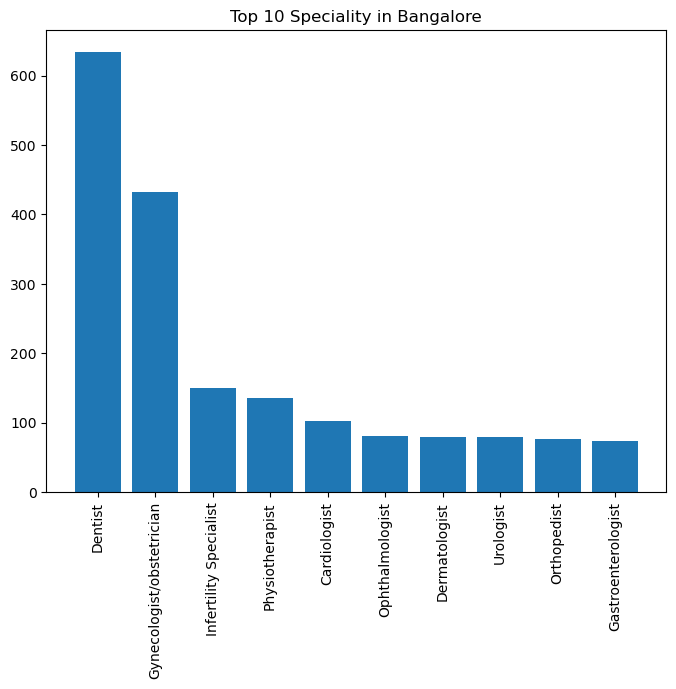

In [57]:
top_10_bangalore = df2.loc[df2['City'] == 'Bangalore','Speciality'].value_counts().nlargest(10)
plt.figure(figsize=(8,6))
plt.bar(top_10_bangalore.index, top_10_bangalore.values)
plt.title('Top 10 Speciality in Bangalore')
plt.xticks(rotation=90)
plt.show()

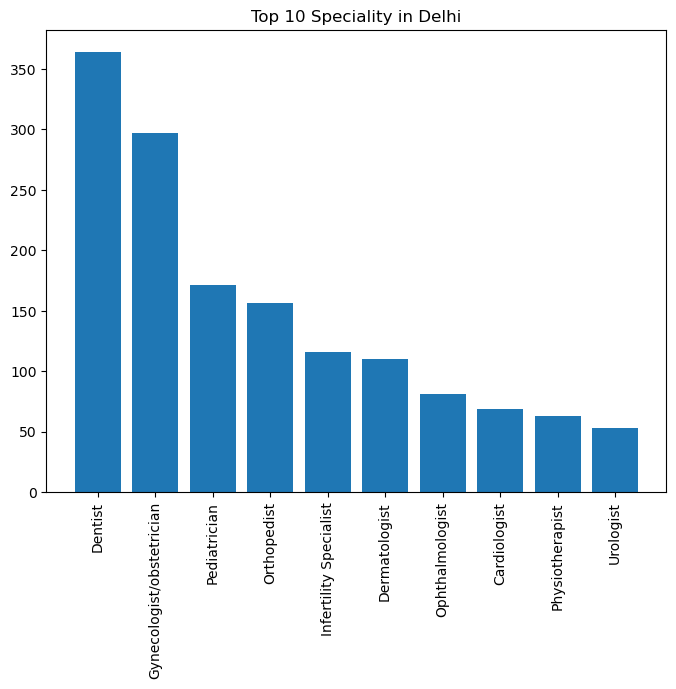

In [58]:
top_10_Delhi = df2.loc[df2['City'] == 'Delhi','Speciality'].value_counts().nlargest(10)
plt.figure(figsize=(8,6))
plt.bar(top_10_Delhi.index, top_10_Delhi.values)
plt.title('Top 10 Speciality in Delhi')
plt.xticks(rotation=90)
plt.show()

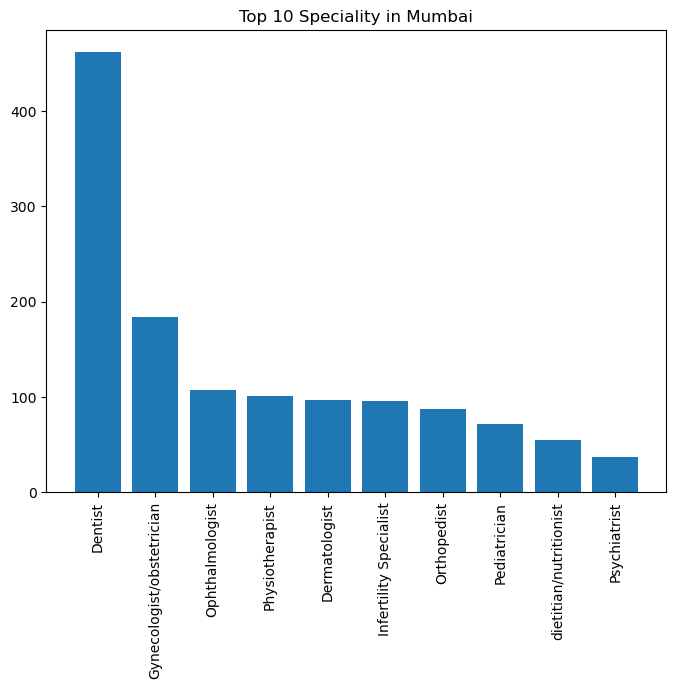

In [59]:
top_10_Mumbai = df2.loc[df2['City'] == 'Mumbai','Speciality'].value_counts().nlargest(10)
plt.figure(figsize=(8,6))
plt.bar(top_10_Mumbai.index, top_10_Mumbai.values)
plt.title('Top 10 Speciality in Mumbai')
plt.xticks(rotation=90)
plt.show()

In [60]:
df2.drop('Name',axis=1, inplace=True)

In [61]:
df2

,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee
1,Dentist,"BDS, MICOI (USA)",25,Kalyan Nagar,Bangalore,98,3787,500
2,Dentist,"BDS, MDS - Orthodontics",21,Jayanagar 4 Block,Bangalore,98,258,300
3,Dentist,"BDS, MDS - Paedodontics And Preventive Dentistry",24,Koramangala,Bangalore,97,4311,300
4,Dentist,"BDS, MDS - Orthodontics",21,Kalyan Nagar,Bangalore,99,1528,500
5,Dentist,"BDS, MDS - Orthodontics",54,Domlur,Bangalore,100,20,500
...,...,...,...,...,...,...,...,...
5420,Ophthalmologist,"MBBS, MS - Ophthalmology",37,Chembur East,Mumbai,100,17,800
5421,Ophthalmologist,"MBBS, DNB - Ophthalmology",13,Goregaon West,Mumbai,100,17,700
5422,Ophthalmologist,"MBBS, MS - Ophthalmology",14,Chembur,Mumbai,100,17,1000
5423,Ophthalmologist,"MS - Ophthalmology, MD - Physician",9,Malad West,Mumbai,100,17,1200


## Outlier Analysis

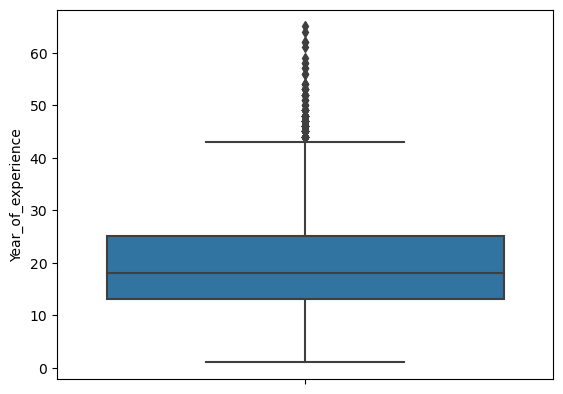

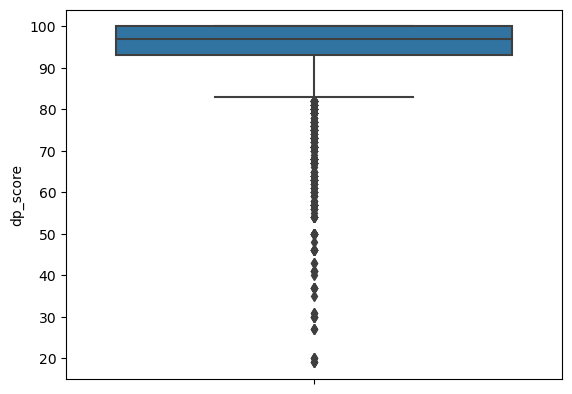

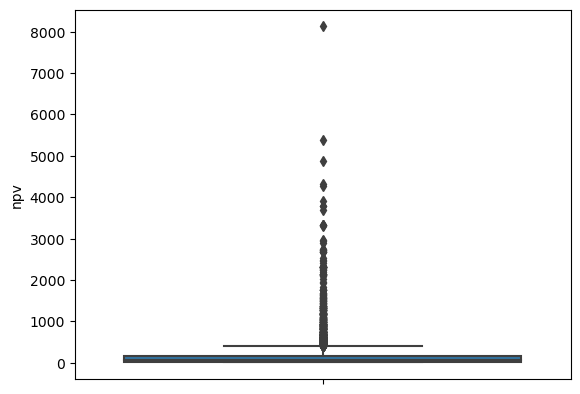

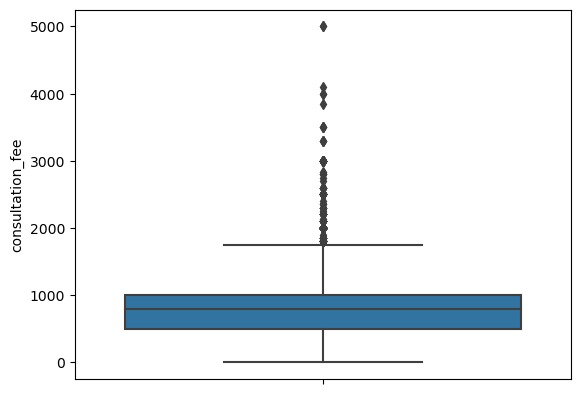

In [62]:
for i in num:
    plt.figure()
    sns.boxplot(y=i,data=df2)

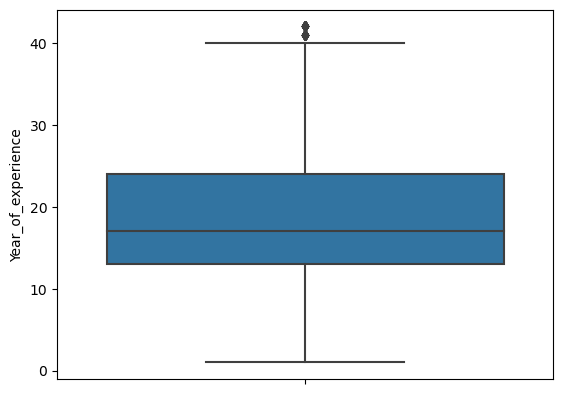

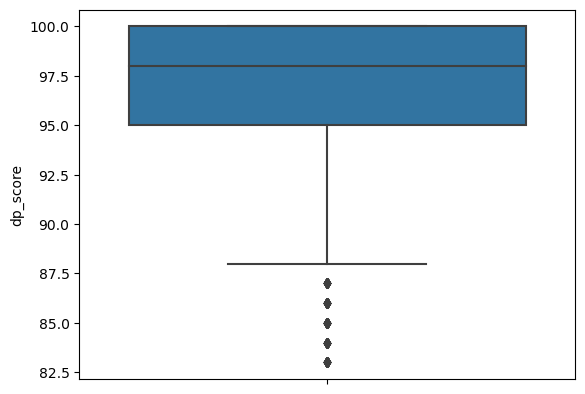

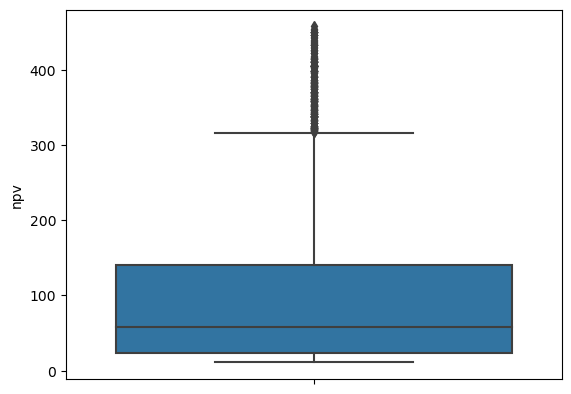

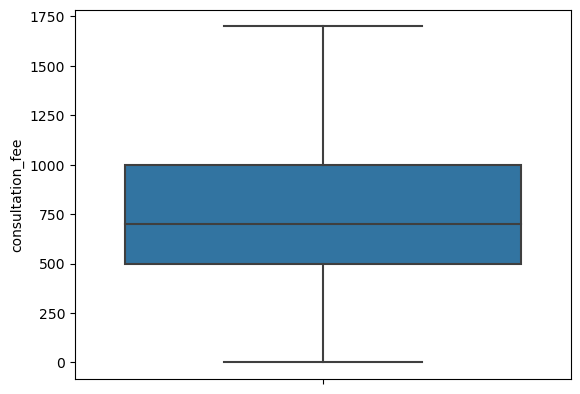

In [63]:
for i in num:
    q1=df2[i].quantile(0.25)
    q3=df2[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    df2=df2[(df2[i]>ll) & (df2[i]<ul)]
    plt.figure()
    sns.boxplot(y=i,data=df2)

In [64]:
df2.shape

(4021, 8)

## Data Preprocessing

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
# LabelEncoding
le=LabelEncoder()

In [67]:
col=['Degree','Location']
for j in col:
    df2[j]=le.fit_transform(df2[j])

In [68]:
df2.head()

,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee
2,Dentist,45,21,159,Bangalore,98,258,300
6,Dentist,25,24,122,Bangalore,96,446,500
7,Dentist,44,38,330,Bangalore,94,308,500
9,Dentist,639,22,132,Bangalore,100,108,500
10,Dentist,25,17,413,Bangalore,94,70,300


In [69]:
#OneHotEncoding
df2_new = pd.get_dummies(df2, columns = ['Speciality','City'])

In [70]:
df2_new .head()

,Degree,Year_of_experience,Location,dp_score,npv,consultation_fee,Speciality_Cardiologist,Speciality_Dentist,Speciality_Dermatologist,Speciality_Gastroenterologist,...,Speciality_Psychiatrist,Speciality_Pulmonologist,Speciality_Rheumatologist,Speciality_Urologist,Speciality_bariatric surgeon,Speciality_chiropractor,Speciality_dietitian/nutritionist,City_Bangalore,City_Delhi,City_Mumbai
2,45,21,159,98,258,300,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,25,24,122,96,446,500,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,44,38,330,94,308,500,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,639,22,132,100,108,500,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10,25,17,413,94,70,300,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Extract the independent and dependent variable

In [71]:
# Independent Variable
X=df2_new.drop(['consultation_fee'], axis=1).values
# Dependent Variable
Y=df2_new['consultation_fee'].values

### Split the dataset into training and testing

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [74]:
from sklearn.preprocessing import StandardScaler

### Scaling the data

In [75]:
sc=StandardScaler()

In [76]:
X_train=sc.fit_transform(X_train)

In [77]:
X_test=sc.transform(X_test)

### Linear Regression Model

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
reg=LinearRegression()

In [80]:
reg.fit(X_train, Y_train)

LinearRegression()

In [81]:
Y_pred=reg.predict(X_test)

In [82]:
Y_pred

array([ 576.21332041,  990.30707041,  555.27582041, ...,  975.68207041,
       1024.02582041,  976.90082041])

### Evaluating the model using MSE, RMSE and R square

In [83]:
from sklearn import metrics

In [84]:
# Mean Square Error(MSE)
MSE=metrics.mean_squared_error(Y_test, Y_pred)
print('MSE =',MSE)
# Root mean square error(RSME)
RMSE=np.sqrt(MSE)
print('RMSE =',RMSE)
# Coefficient of determination or R-squared
R2=metrics.r2_score(Y_test,Y_pred)
print('R-squared =',R2)

MSE = 63014.42734782294
RMSE = 251.0267462797997
R-squared = 0.49518461917669687


In [85]:
print('Coefficients:',reg.coef_)

Coefficients: [ 7.89716324e+00  6.65967887e+01  2.51237695e+01 -6.36548757e+00
 -1.74206609e+00  7.67771794e+13  2.07771287e+14  9.72053607e+13
  5.56528162e+13  1.64418589e+14  1.10613183e+14  5.50266930e+13
  6.15421046e+13  1.05091063e+14  1.07461167e+14  9.06380058e+13
  1.15528373e+14  6.68770729e+13  4.97163479e+13  3.67357262e+13
  6.15421046e+13  5.37511532e+13  1.46390189e+13  6.78892881e+13
 -8.04475358e+12 -7.43361213e+12 -7.21561716e+12]


In [86]:
print('Intercept:',reg.intercept_)

Intercept: 741.775820410147
